### Подключение библиотек и скриптов

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:72,5% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
plt.rcParams.update({'font.size': 14})
pd.set_option('precision', 3)
pd.set_option('max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('max_colwidth', 300)

### Пути к директориям и файлам

In [5]:
TRAIN_DATASET_PATH = './data/HTRU_2.csv'

### Загрузка данных

In [6]:
data = pd.read_csv(TRAIN_DATASET_PATH)

### Изучение датасета

In [7]:
data.head()

,140.5625,55.68378214,-0.234571412,-0.699648398,3.199832776,19.11042633,7.975531794,74.24222492,0
0,102.50781,58.88243,0.46532,-0.51509,1.67726,14.86015,10.57649,127.39358,0
1,103.01562,39.34165,0.32333,1.05116,3.12124,21.74467,7.73582,63.17191,0
2,136.75000,57.17845,-0.06841,-0.63624,3.64298,20.95928,6.89650,53.59366,0
3,88.72656,40.67223,0.60087,1.12349,1.17893,11.46872,14.26957,252.56731,0
4,93.57031,46.69811,0.53190,0.41672,1.63629,14.54507,10.62175,131.39400,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17897 entries, 0 to 17896
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   140.5625      17897 non-null  float64
 1   55.68378214   17897 non-null  float64
 2   -0.234571412  17897 non-null  float64
 3   -0.699648398  17897 non-null  float64
 4   3.199832776   17897 non-null  float64
 5   19.11042633   17897 non-null  float64
 6   7.975531794   17897 non-null  float64
 7   74.24222492   17897 non-null  float64
 8   0             17897 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [9]:
data.rename(columns={'140.5625': 'Mean of the integrated profile',
                     '55.68378214': 'Standard deviation of the integrated profile',
                     '-0.234571412': 'Excess kurtosis of the integrated profile',
                     '-0.699648398': 'Skewness of the integrated profile',
                     '3.199832776': 'Mean of the DM-SNR curve',
                     '19.11042633': 'Standard deviation of the DM-SNR curve',
                     '7.975531794': 'Excess kurtosis of the DM-SNR curve',
                     '74.24222492': 'Skewness of the DM-SNR curve',
                     '0': 'target'}, inplace=True)
# 1. Mean of the integrated profile - Среднее значение интегрированного профиля
# 2. Standard deviation of the integrated profile - Стандартное отклонение интегрированного профиля
# 3. Excess kurtosis of the integrated profile - Чрезмерный эксцесс интегрированного профиля
# 4. Skewness of the integrated profile - Асимметрия интегрированного профиля
# 5. Mean of the DM-SNR curve - Среднее значение кривой DM-SNR
# 6. Standard deviation of the DM-SNR curve - Стандартное отклонение кривой DM-SNR
# 7. Excess kurtosis of the DM-SNR curve - Избыточный эксцесс кривой DM-SNR
# 8. Skewness of the DM-SNR curve - Асимметрия кривой DM-SNR.
# 9. target - Целевая переменная.

In [10]:
data.tail()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target
17892,136.42969,59.84742,-0.18785,-0.73812,1.29682,12.16606,15.45026,285.93102,0
17893,122.55469,49.48561,0.12798,0.32306,16.40970,44.62689,2.94524,8.29709,0
17894,119.33594,59.93594,0.15936,-0.74303,21.43060,58.87200,2.49952,4.59517,0
17895,114.50781,53.90240,0.20116,-0.02479,1.94649,13.38173,10.00797,134.23891,0
17896,57.06250,85.79734,1.40639,0.08952,188.30602,64.71256,-1.59753,1.42948,0


data.info()

In [11]:
print(data.shape)

(17897, 9)


### Количественные переменные

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Mean of the integrated profile,17897.00000,111.07832,25.65271,5.81250,100.92969,115.07812,127.08594,192.61719
Standard deviation of the integrated profile,17897.00000,46.54902,6.84304,24.77204,42.37543,46.94644,51.02289,98.77891
Excess kurtosis of the integrated profile,17897.00000,0.47790,1.06406,-1.87601,0.02711,0.22324,0.47335,8.06952
Skewness of the integrated profile,17897.00000,1.77042,6.16806,-1.79189,-0.18853,0.19874,0.92821,68.10162
Mean of the DM-SNR curve,17897.00000,12.61493,29.47364,0.21321,1.92308,2.80184,5.46488,223.39214
Standard deviation of the DM-SNR curve,17897.00000,26.32692,19.47104,7.37043,14.43733,18.45998,28.42815,110.64221
Excess kurtosis of the DM-SNR curve,17897.00000,8.30357,4.50622,-3.13927,5.78149,8.43387,10.70297,34.53984
Skewness of the DM-SNR curve,17897.00000,104.85942,106.51727,-1.97698,34.95712,83.06900,139.31090,1191.00084
target,17897.00000,0.09158,0.28844,0.00000,0.00000,0.00000,0.00000,1.00000


### Целевая переменная

In [13]:
data['target'].value_counts()

0    16258
1     1639
Name: target, dtype: int64

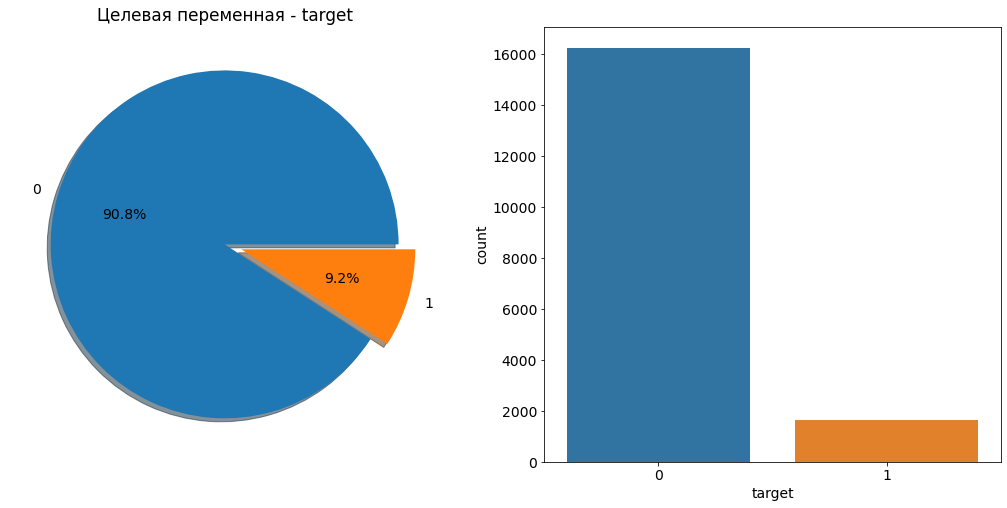

In [14]:
f, ax=plt.subplots(1, 2, figsize=(18, 8))
data['target'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Целевая переменная - target')
ax[0].set_ylabel('')
sns.countplot('target', data=data, ax=ax[1])
plt.show()

###  Обработка выбросов и пропусков

In [15]:
data.isnull().sum()

Mean of the integrated profile                  0
Standard deviation of the integrated profile    0
Excess kurtosis of the integrated profile       0
Skewness of the integrated profile              0
Mean of the DM-SNR curve                        0
Standard deviation of the DM-SNR curve          0
Excess kurtosis of the DM-SNR curve             0
Skewness of the DM-SNR curve                    0
target                                          0
dtype: int64

### Корреляция признаков

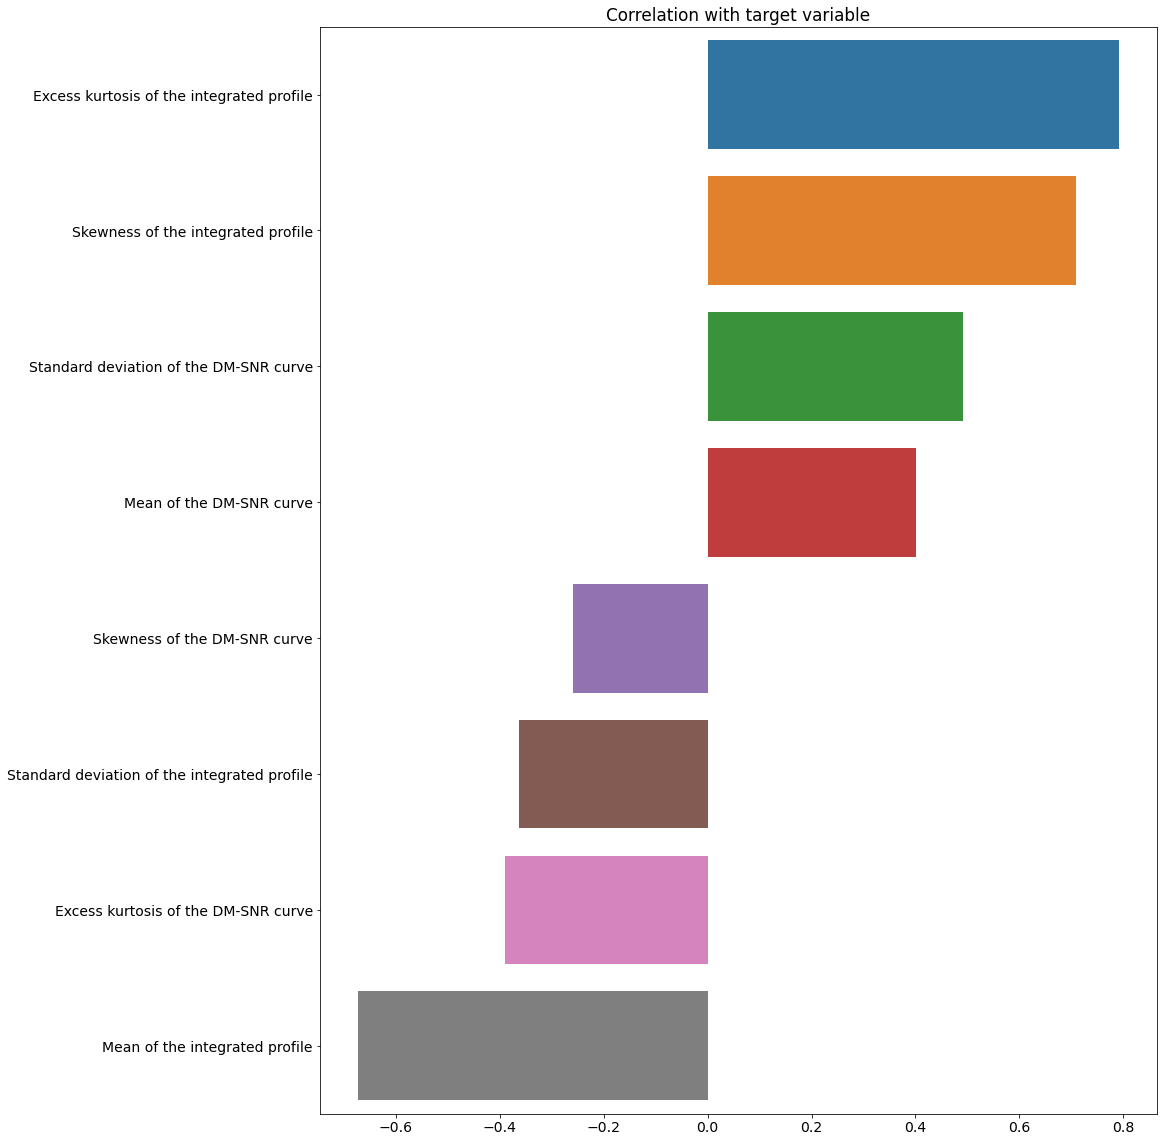

In [16]:
TARGET_NAME = 'target'

corr_with_target = data.corr()[TARGET_NAME].sort_values(ascending=False)[1:]
plt.figure(figsize=(15, 20))
sns.barplot(x=corr_with_target.values, y=corr_with_target.index)
plt.title('Correlation with target variable')
plt.show()

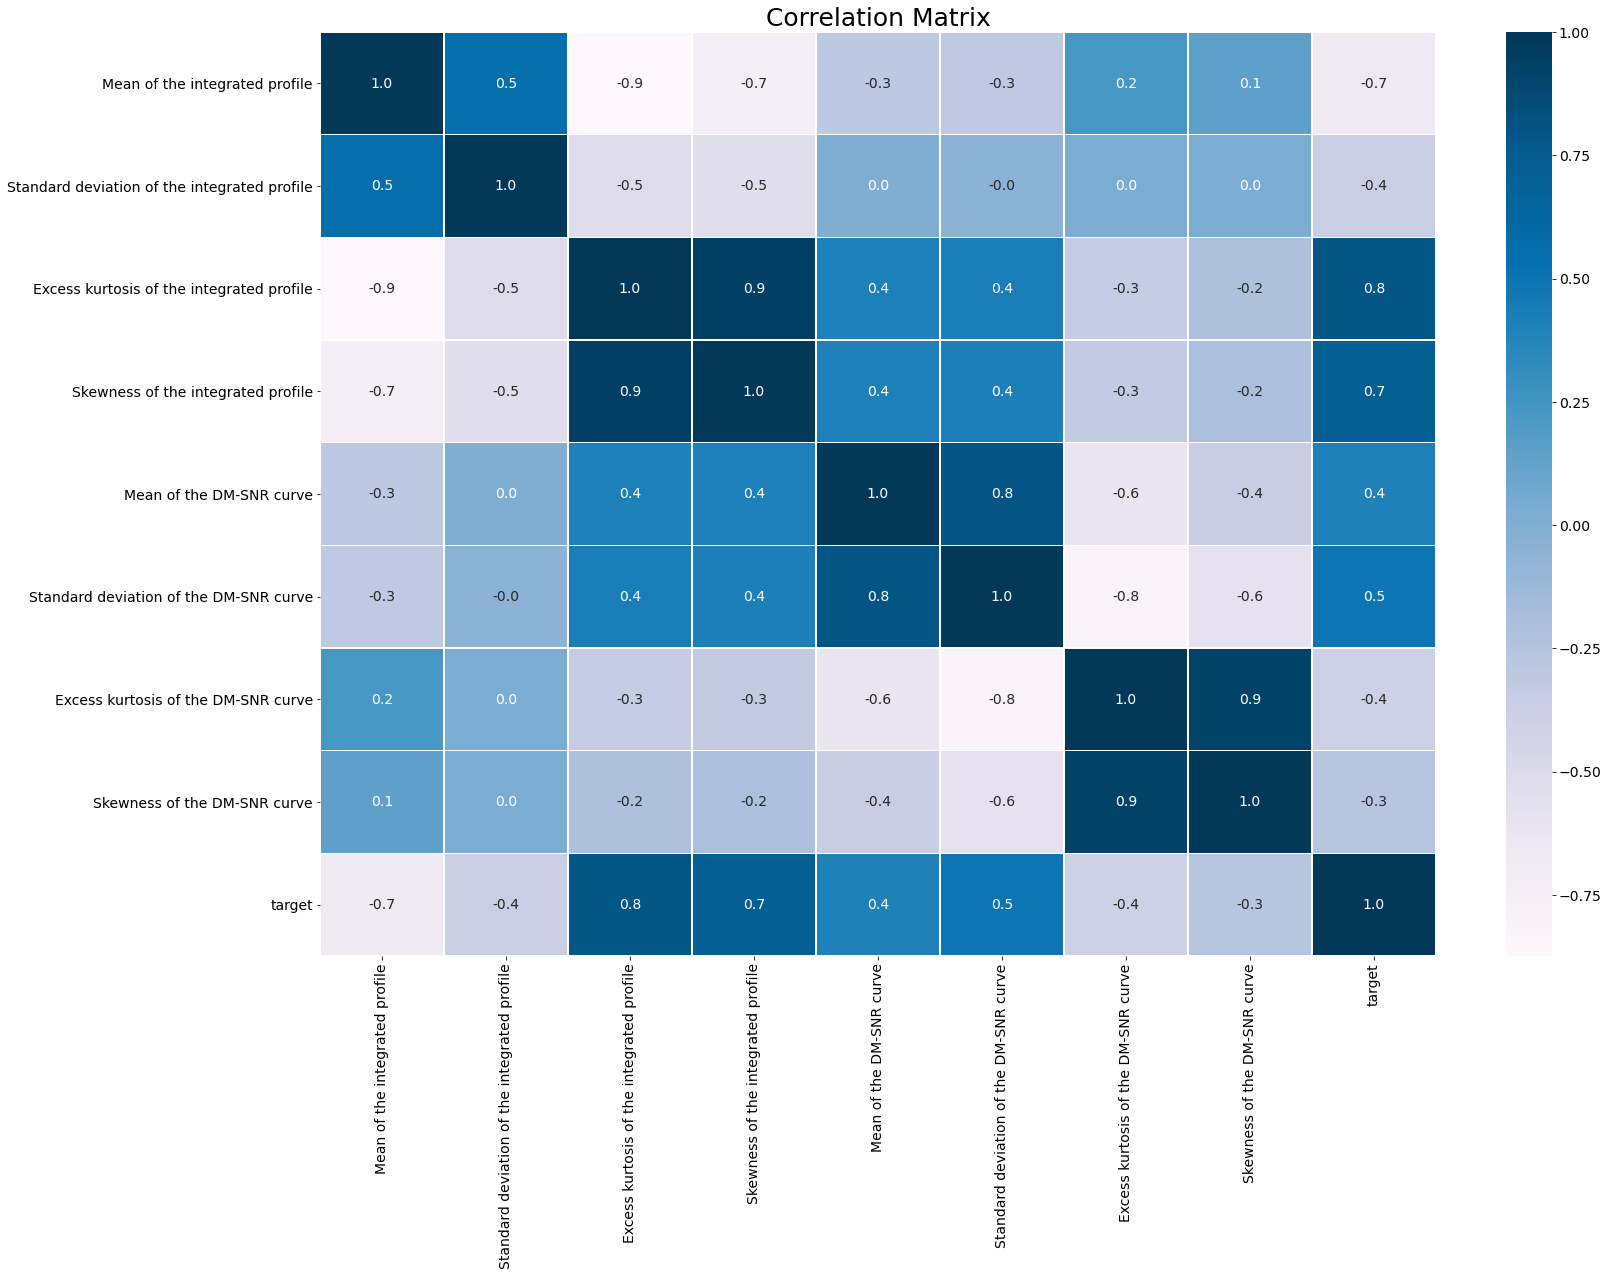

In [17]:
# Correlation Matrix
f, ax = plt.subplots(figsize = [25, 17])
sns.heatmap(data.corr(), annot=True, fmt='.1f', linewidths=.5, ax=ax, cmap = 'PuBu' )
ax.set_title('Correlation Matrix', fontsize=25)
plt.show()

### Feature engineering

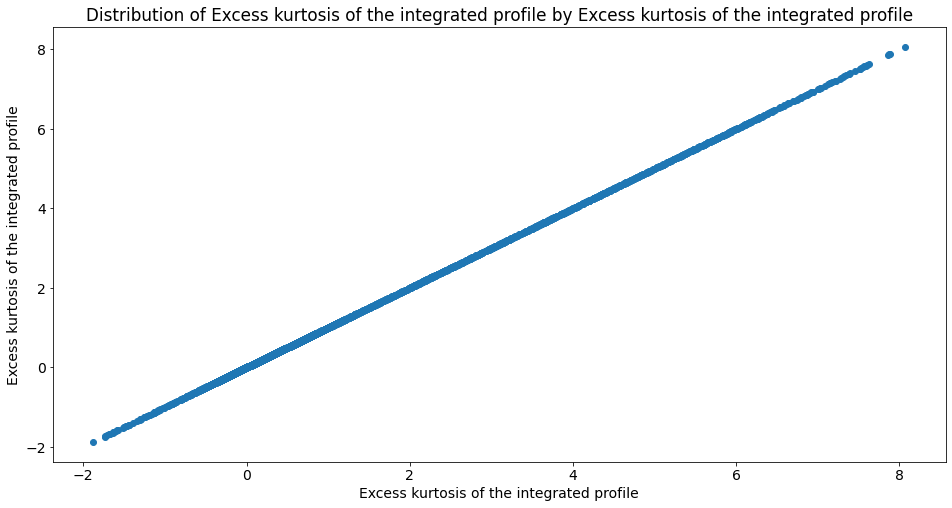

In [18]:
plt.figure(figsize = (16, 8))
plt.scatter(data['Excess kurtosis of the integrated profile'], data['Excess kurtosis of the integrated profile'])
plt.ylabel('Excess kurtosis of the integrated profile')
plt.xlabel('Excess kurtosis of the integrated profile')
plt.title('Distribution of Excess kurtosis of the integrated profile by Excess kurtosis of the integrated profile')
plt.show();

In [19]:
data['Excess kurtosis of the integrated profile'].describe([.01,.1,.25,.5,.75,.9,.91,.92,.93,.94,.95,.96])

count   17897.00000
mean        0.47790
std         1.06406
min        -1.87601
1%         -0.47919
10%        -0.13319
25%         0.02711
50%         0.22324
75%         0.47335
90%         0.89182
91%         1.01816
92%         1.21621
93%         1.61137
94%         2.13656
95%         2.70675
96%         3.34544
max         8.06952
Name: Excess kurtosis of the integrated profile, dtype: float64

In [20]:
# data.drop('Skewness of the integrated profile', axis=1, inplace=True)
# data.drop('Excess kurtosis of the DM-SNR curve', inplace=True)

### PyCaret 2 Classification

In [21]:
from pycaret.classification import *

In [22]:
clf1 = setup(data = data, 
             target = 'target',
             silent = True)

,Description,Value
0,session_id,3003
1,Target,target
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(17897, 9)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


### Compare Baseline

In [23]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9803,0.9791,0.8564,0.9211,0.8873,0.8765,0.8774,13.7420
rf,Random Forest Classifier,0.9798,0.9688,0.8459,0.9257,0.8836,0.8726,0.8739,0.6220
lightgbm,Light Gradient Boosting Machine,0.9796,0.9765,0.8538,0.9162,0.8837,0.8726,0.8733,0.1450
lr,Logistic Regression,0.9792,0.9769,0.8203,0.9425,0.8770,0.8656,0.8683,0.7000
et,Extra Trees Classifier,0.9789,0.9720,0.8370,0.9236,0.8780,0.8665,0.8679,0.3390
xgboost,Extreme Gradient Boosting,0.9784,0.9751,0.8441,0.9122,0.8765,0.8648,0.8657,1.1780
ada,Ada Boost Classifier,0.9780,0.9757,0.8229,0.9266,0.8711,0.8592,0.8613,0.2540
gbc,Gradient Boosting Classifier,0.9776,0.9767,0.8485,0.8999,0.8732,0.8609,0.8615,0.9130
lda,Linear Discriminant Analysis,0.9752,0.9767,0.7692,0.9471,0.8488,0.8354,0.8409,0.0170
knn,K Neighbors Classifier,0.9714,0.9341,0.7798,0.8922,0.8320,0.8164,0.8188,0.0830


### Create Model

In [24]:
model_cbc = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9848,0.9807,0.9115,0.9196,0.9156,0.9072,0.9072
1,0.9824,0.9790,0.8761,0.9252,0.9000,0.8904,0.8908
2,0.9769,0.9878,0.8421,0.8972,0.8688,0.8561,0.8566
3,0.9769,0.9884,0.8509,0.8899,0.8700,0.8573,0.8575
4,0.9856,0.9857,0.8772,0.9615,0.9174,0.9096,0.9107
5,0.9800,0.9828,0.8421,0.9320,0.8848,0.8739,0.8752
6,0.9721,0.9659,0.8158,0.8692,0.8416,0.8263,0.8268
7,0.9784,0.9660,0.8230,0.9300,0.8732,0.8615,0.8634
8,0.9816,0.9793,0.8761,0.9167,0.8959,0.8859,0.8861
9,0.9840,0.9756,0.8496,0.9697,0.9057,0.8970,0.8993


### Tune Hyperparameters

In [25]:
tuned_cbc = tune_model(model_cbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9816,0.9789,0.8938,0.9018,0.8978,0.8877,0.8877
1,0.9824,0.9810,0.8761,0.9252,0.9000,0.8904,0.8908
2,0.9769,0.9886,0.8333,0.9048,0.8676,0.8549,0.8558
3,0.9824,0.9878,0.8947,0.9107,0.9027,0.8930,0.8930
4,0.9856,0.9889,0.8684,0.9706,0.9167,0.9088,0.9105
5,0.9792,0.9838,0.8333,0.9314,0.8796,0.8683,0.8699
6,0.9745,0.9649,0.8158,0.8942,0.8532,0.8393,0.8403
7,0.9776,0.9643,0.8230,0.9208,0.8692,0.8570,0.8586
8,0.9824,0.9768,0.8761,0.9252,0.9000,0.8904,0.8908
9,0.9832,0.9809,0.8496,0.9600,0.9014,0.8923,0.8943


### Analyze Model

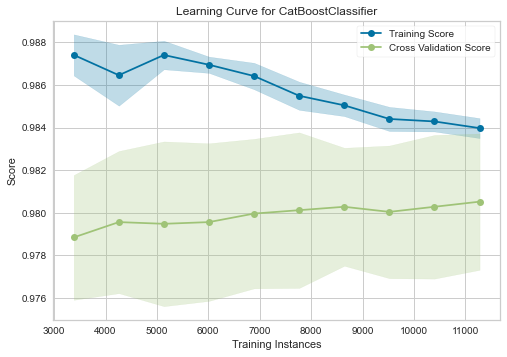

In [26]:
# Learning Curve
plot_model(estimator = tuned_cbc, plot = 'learning')

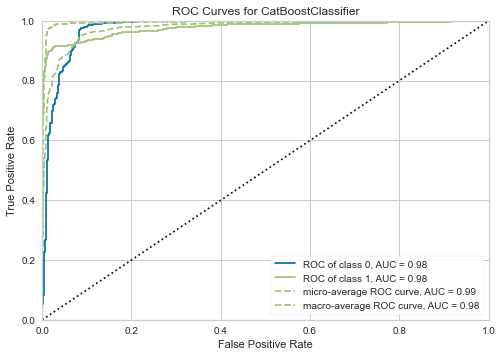

In [27]:
# AUC Curve
plot_model(estimator = tuned_cbc, plot = 'auc')

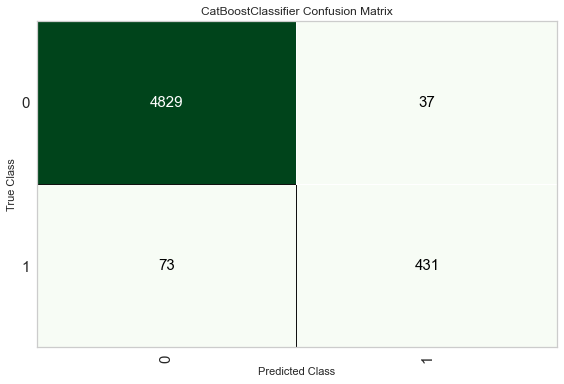

In [28]:
# Confusion Matrix
plot_model(estimator = tuned_cbc, plot = 'confusion_matrix')

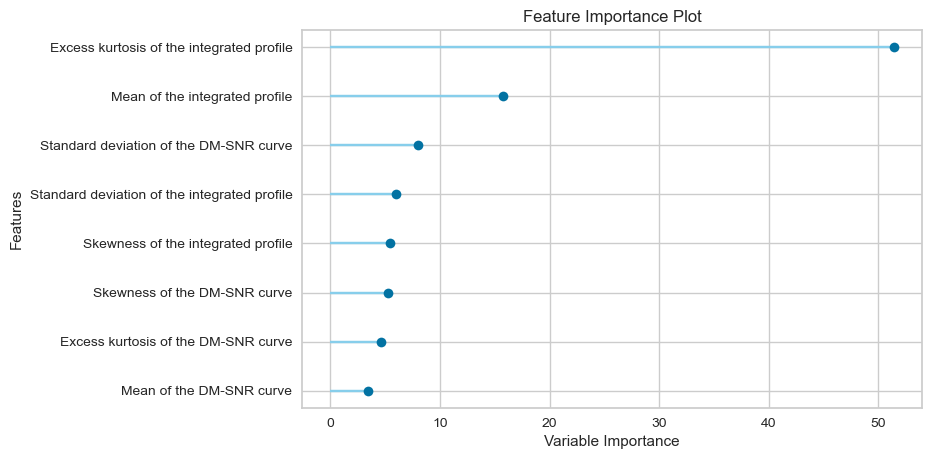

In [29]:
# Feature Importance
plot_model(estimator = tuned_cbc, plot = 'feature')

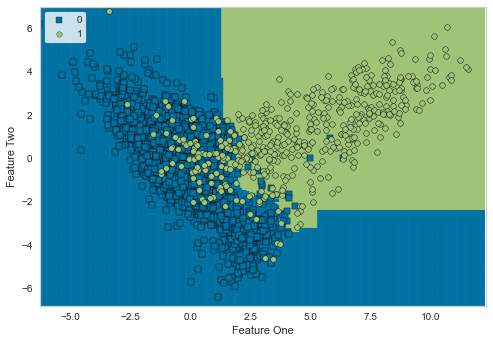

In [30]:
plot_model(tuned_cbc, plot = 'boundary')

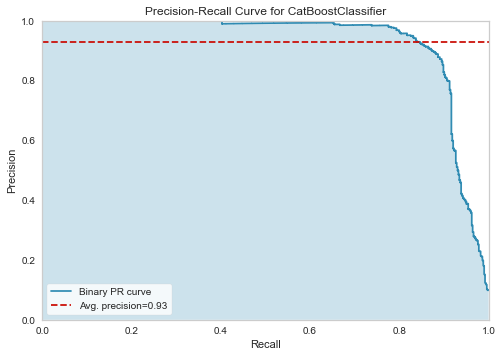

In [31]:
plot_model(tuned_cbc, plot = 'pr')

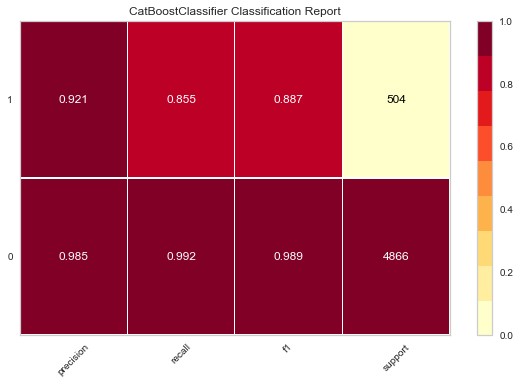

In [32]:
plot_model(tuned_cbc, plot = 'class_report')

In [33]:
evaluate_model(tuned_cbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### Interpret Model

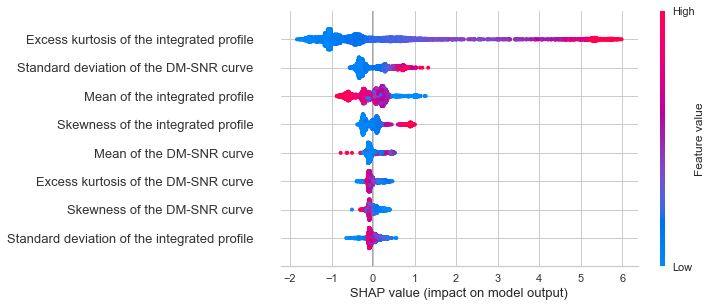

In [34]:
interpret_model(tuned_cbc)

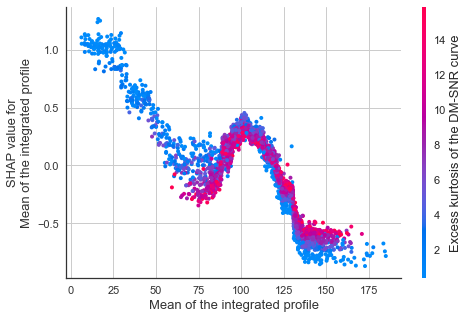

In [35]:
interpret_model(tuned_cbc, plot = 'correlation')

### Predict Model

In [59]:
predictions = predict_model(tuned_cbc)
predictions.head(55)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9795,0.9764,0.8552,0.9209,0.8868,0.8756,0.8763


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target,Label,Score
0,89.67969,41.57560,0.61412,1.18180,1.65301,15.17035,11.64662,154.30486,0,0,0.98800
1,119.31250,45.54938,0.29506,0.21364,0.41137,8.84971,24.20474,631.40552,0,0,0.99460
2,126.65625,50.43722,0.00784,-0.40367,2.20150,14.91863,9.63778,115.07197,0,0,0.99860
3,148.07812,52.10065,-0.17724,-0.14549,2.28261,13.66172,9.51903,125.14266,0,0,0.99910
4,120.32031,49.40077,0.25765,-0.14110,2.91304,21.40709,8.72839,82.03292,0,0,0.99470
5,128.45312,54.87441,0.02901,-0.23181,2.51505,14.88385,8.45441,96.64326,0,0,0.99850
6,137.78125,51.57896,0.00348,-0.46243,6.16137,27.74300,5.70182,36.02687,0,0,0.99830
7,134.02344,51.90217,-0.21446,0.02135,2.72826,15.63213,8.42294,90.24192,0,0,0.99900
8,129.21094,49.13480,0.01469,-0.22972,1.86037,14.81174,10.72950,136.64003,0,0,0.99860
9,68.66406,39.96078,2.20795,6.62612,18.96070,49.14829,2.82585,7.62633,1,1,0.92930


### Save / Load Model

In [37]:
save_model(tuned_cbc, model_name='model_cbc')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='target',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                 ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='target')),
                 ('fix_perfect', Remove_100(target='target')),
                 ('clean_names', 

In [38]:
# import requests
# url = 'http://127.0.0.1:8080/predict_api'
# pred = requests.post(url, json={'Mean of the integrated profile':57, 'Standard deviation of the integrated profile':42,
#                                 'Excess kurtosis of the integrated profile':3, 'Skewness of the integrated profile':10, 
#                                 'Mean of the DM-SNR curve':18, 'Standard deviation of the DM-SNR curve':48, 
#                                 'Excess kurtosis of the DM-SNR curve':2, 'Skewness of the DM-SNR curve':8})
# print(pred.json())

In [57]:
from pycaret.utils import check_metric
check_metric(predictions.target, predictions.Label, 'AUC')

0.9238